# testing 

In [1]:
from dynamics import ClassDynamics
from network import ClassNetwork


# parameter setting
nb_banks=50
alpha_init=0.01  # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03 # if too big, the lux version generates huge shocks
collateral_value=1.0
initialization_method="pareto"
alpha_pareto=1.3
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.05
result_location="./results/single_run/test/"
min_repo_trans_size=1e-8  # 1e-8
nb_steps=int(5e3)
dump_period=int(5e2)
plot_period=int(5e2)
cp_option=True
LCR_mgt_opt=True
heavy_plot=False
notice_period=0

# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    alpha_init=alpha_init,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    alpha=alpha,
    gamma=gamma,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    notice_period=notice_period,
)

# initialize ClassDynamics
dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=result_location,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
dynamics.simulate()

simulate the repo market


100%|██████████| 499/499 [1:13:20<00:00,  8.82s/it] 


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 738433.80it/s]


get arr_rev_repo_exp_adj


4604it [00:02, 1715.50it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 499/499 [00:02<00:00, 209.95it/s]


get jaccard


100%|██████████| 498/498 [00:00<00:00, 5559.35it/s]


get density


100%|██████████| 498/498 [00:00<00:00, 4553.30it/s]


get degree stats


100%|██████████| 498/498 [00:00<00:00, 1750.46it/s]


get exposure stats


100%|██████████| 500/500 [00:00<00:00, 4881.04it/s]


run core-periphery tests


  0%|          | 0/5 [00:00<?, ?it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2796.56it/s]


test on day 499


 20%|██        | 1/5 [00:00<00:02,  1.95it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2736.15it/s]


test on day 499


 40%|████      | 2/5 [00:00<00:01,  2.52it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2850.30it/s]


test on day 499


 60%|██████    | 3/5 [00:01<00:00,  2.75it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2854.51it/s]


test on day 499


 80%|████████  | 4/5 [00:01<00:00,  2.81it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 1578.95it/s]


test on day 499


100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


get transaction stats av. network


100%|██████████| 499/499 [00:00<00:00, 777.61it/s]


get transaction stats av. bank


100%|██████████| 499/499 [00:00<00:00, 1176.43it/s]


In [1]:
740/60

12.333333333333334

In [2]:
Network.banks[19].df_rev_repo_trans

amount start_step end_step status
bank_id trans_id                                     
33      0         0.006155          1      NaN   True
39      0         0.115058          2      300  False
1       0         0.694703          2      180  False
45      0         1.941992          3      NaN   True
        1         0.114529          5      NaN   True
...                    ...        ...      ...    ...
24      1         2.556034        421      NaN   True
45      3         0.078457        425      NaN   True
11      8         3.536986        180      480  False
        9         0.645293        483      NaN   True
        10        5.392897        487      NaN   True

[82 rows x 4 columns]

In [5]:
Network.banks[0].df_rev_repo_trans.loc[12]

,amount,start_step,end_step,status
trans_id,,,,
0,1.53307,3,NaN,True


# analysis

In [3]:
import numpy as np 
for chain in Network.chains_rev_repo:
   if  len(np.unique (np.array(chain))) < len(np.array(chain)):
      print("error")

In [2]:
len(Network.chains_rev_repo)

NameError: name 'Network' is not defined

In [4]:
max = 0 
min = 19
sum = 0
for chain in Network.chains_rev_repo:
   if  len(chain) > max:
      max = len(chain)
   if  len(chain) < min:
      min = len(chain)
   sum +=len(chain)

print(max)
print(min)
print(sum/len(Network.chains_rev_repo))

20
2
11.006047370327007


In [11]:
selected_chains = []
for chain in Network.chains_rev_repo:
    if 11 in chain and 38 in chain:
        selected_chains.append(chain)
selected_chains

[]

In [9]:
Network.banks[11].df_rev_repo_trans

,,amount,start_step,end_step,status
bank_id,trans_id,,,,
44,0,2.080464,0,NaN,True
38,0,2.804132,0,20,False
8,0,0.614016,0,NaN,True
36,0,16.888889,2,NaN,True
16,0,3.009163,2,NaN,True
43,0,0.507507,2,NaN,True


In [5]:
Network.chains_rev_repo

[[13, 23, 3, 5, 40, 26, 6, 24],
 [25, 35, 15, 10, 1, 36, 33, 0, 31],
 [25, 35, 15, 10, 1, 36, 33, 32, 8, 31],
 [25, 35, 15, 10, 1, 36, 33, 32, 24],
 [25, 35, 15, 10, 1, 36, 33, 32, 4, 47, 27, 34],
 [25, 35, 15, 10, 1, 36, 33, 32, 47, 27, 34],
 [25, 35, 15, 10, 1, 36, 33, 32, 8, 31],
 [25, 35, 15, 10, 1, 36, 33, 8, 37, 27, 40, 45, 24],
 [25, 35, 15, 10, 1, 36, 33, 8, 31],
 [25, 35, 15, 10, 1, 36, 33, 8, 31, 27, 40, 45, 24],
 [25, 35, 15, 10, 1, 36, 33, 8, 31, 37, 27, 40, 45, 24],
 [25, 35, 15, 10, 1, 36, 33, 34],
 [25, 35, 15, 10, 1, 36, 33, 43, 34],
 [13, 23, 3, 5, 40, 26, 6, 24],
 [25, 35, 15, 10, 1, 36, 33, 32, 38, 30, 31],
 [25, 35, 15, 10, 1, 36, 33, 34, 30, 31],
 [25, 35, 15, 10, 1, 36, 33, 43, 34, 30, 31],
 [25, 35, 15, 10, 1, 36, 33, 0, 31, 27, 19, 24],
 [25, 35, 29, 36, 26, 21, 19, 24],
 [25, 35, 15, 10, 1, 36, 33, 0, 31, 37, 27, 19, 24],
 [25, 35, 15, 10, 1, 36, 33, 32, 8, 37, 27, 19, 24],
 [25, 35, 15, 10, 1, 36, 33, 32, 8, 31, 27, 19, 24],
 [25, 35, 15, 10, 1, 36, 33, 32, 8,

<AxesSubplot: >

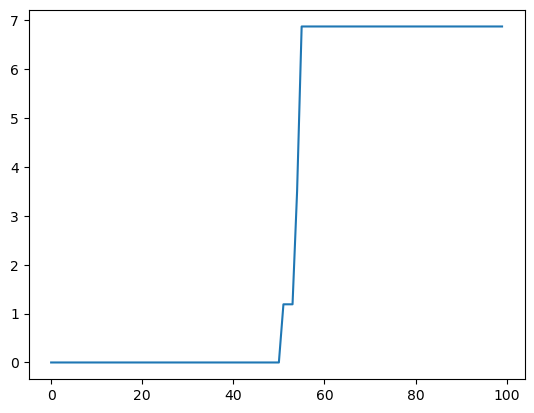

In [5]:
dynamics.df_network_trajectory["securities reused tot. network"].plot()